# PYMC

In [1]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import theano
from numpy.random import binomial, randn, uniform
from sklearn.model_selection import train_test_split
from pymc3.variational.callbacks import CheckParametersConvergence

np.random.seed(42)
pm.set_tt_rng(42)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data1 = [0,1,0,0,0,0,0,0,0,1,
        0,1,0,0,0,0,0,0,0,1,
        0,1,0,0,0,0,0,0,0,1,
        0,1,0,0,0,0,0,0,0,1,
        0,1,0,0,0,0,0,0,0,1,
        0,1,0,0,0,0,0,0,0,1,
        0,1,0,0,0,0,0,0,0,1,
        0,1,0,0,0,0,0,0,0,1,
        0,1,0,0,0,0,0,0,0,1,
        0,1,0,0,0,0,0,0,0,1
        ]

## VI

In [7]:
%%time
with pm.Model() as model:
    p = pm.Beta('theta',1,1)
    likelihood = pm.Bernoulli('likelihood', p=p, observed=data1)
    advi_fit = pm.fit(method='advi')
    trace = pm.sample(1000, cores=8)

Finished [100%]: Average Loss = 52.395
/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [theta]


Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.6773325066507503, but should be close to 0.8. Try to increase the number of tuning steps.


CPU times: user 5.37 s, sys: 236 ms, total: 5.6 s
Wall time: 5.78 s


Got error No model on context stack. trying to find log_likelihood in translation.
/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


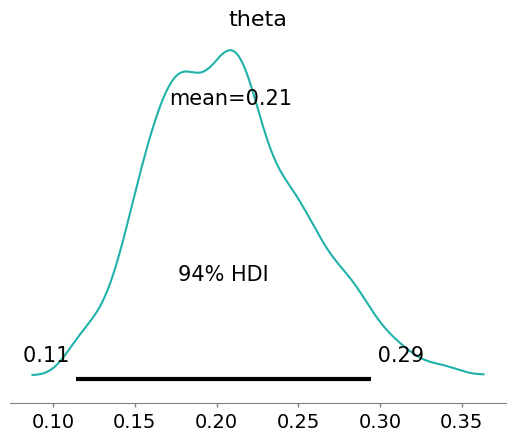

In [8]:
az.plot_posterior(advi_fit.sample(1000), color="LightSeaGreen");

In [9]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.205,0.039,0.134,0.281,0.001,0.0,3742.0,5159.0,1.0


In [8]:
data2 = [0,1,0,0,0,0,0,0,0,1]

In [11]:
with pm.Model() as model2:
    p = pm.Beta('theta',1,1)
    # likelihood = pm.Bernoulli('likelihood', n=100, p=p, observed=20)
    likelihood = pm.Bernoulli('likelihood', p=p, observed=data2)
    advi_fit = pm.fit(method='advi')
    trace = pm.sample(2000, cores=4)

Finished [100%]: Average Loss = 6.2247
/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


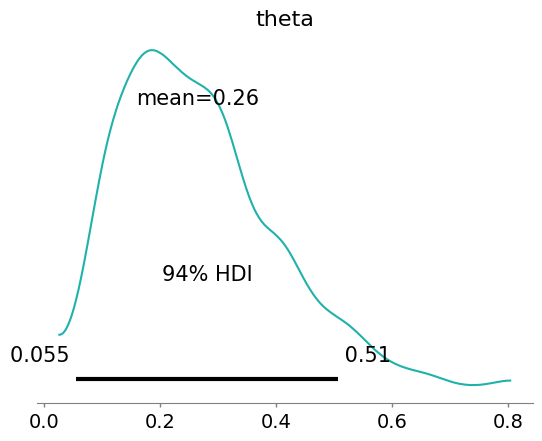

In [12]:
az.plot_posterior(advi_fit.sample(1000), color="LightSeaGreen");

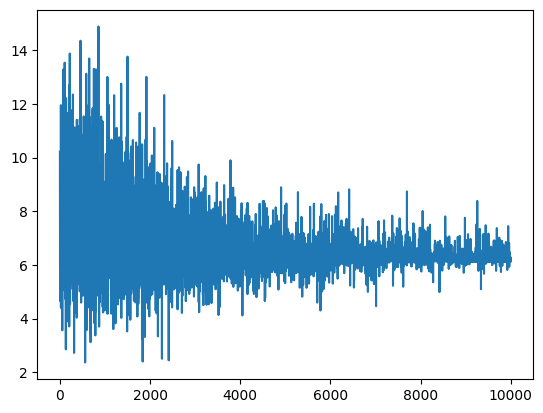

In [13]:
plt.plot(advi_fit.hist)

In [14]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.248,0.118,0.055,0.47,0.002,0.001,3384.0,4158.0,1.0


## MCMC

In [5]:
%%time
with pm.Model() as model:
    p = pm.Beta('theta',1,1)
    likelihood = pm.Bernoulli('likelihood', p=p, observed=data1)
    trace = pm.sample(draws=5000, tune=1000, cores=8)

/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [theta]


Sampling 8 chains for 1_000 tune and 5_000 draw iterations (8_000 + 40_000 draws total) took 5 seconds.
The acceptance probability does not match the target. It is 0.8833088228726031, but should be close to 0.8. Try to increase the number of tuning steps.


CPU times: user 7.1 s, sys: 450 ms, total: 7.55 s
Wall time: 8.12 s


/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/arviz/data/io_pymc3_

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.205,0.04,0.132,0.281,0.0,0.0,17061.0,26662.0,1.0


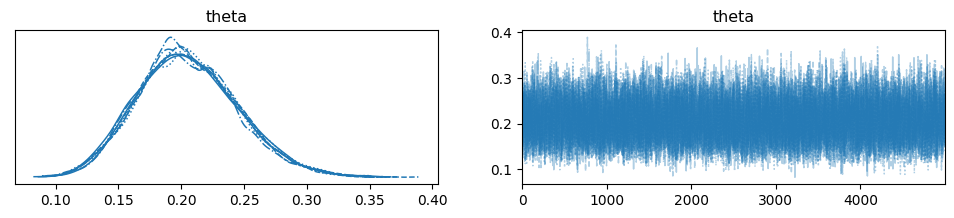

In [6]:
pm.traceplot(trace)
pm.summary(trace)

In [9]:
%%time
with pm.Model() as model:
    p = pm.Beta('theta',1,1)
    likelihood = pm.Bernoulli('likelihood', p=p, observed=data2)
    trace = pm.sample(draws=5000, tune=1000, cores=8)

/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [theta]


Sampling 8 chains for 1_000 tune and 5_000 draw iterations (8_000 + 40_000 draws total) took 5 seconds.


CPU times: user 7.41 s, sys: 357 ms, total: 7.77 s
Wall time: 8.45 s


/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/junseop_yoon/anaconda3/envs/pymc3/lib/python3.7/site-packages/arviz/data/io_pymc3_

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.252,0.12,0.041,0.467,0.001,0.001,16343.0,22481.0,1.0


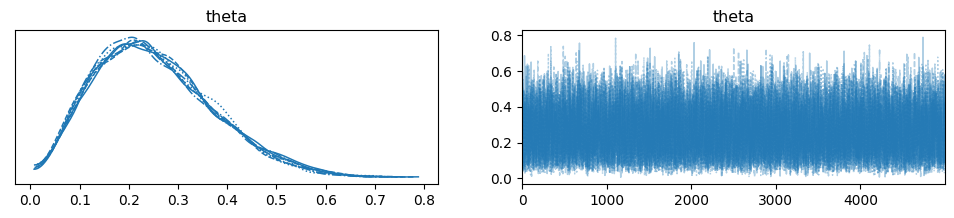

In [10]:
pm.traceplot(trace)
pm.summary(trace)

# CMDSTANPY

In [1]:
import os
from cmdstanpy.model import CmdStanModel
from cmdstanpy.utils import cmdstan_path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
stan file
data {
   int<lower=0> N;
   int<lower=0,upper=1> y[N];
 }
 parameters {
   real<lower=0,upper=1> theta;
 }
 model {
   theta ~ beta(1,1);  // uniform prior on interval 0,1
   y ~ bernoulli(theta);
 }
'''

In [2]:
data_input1 = {
             "N" : 10,
             "y" : [0,1,0,0,0,0,0,0,0,1]
              }

In [3]:
data_input2 = {
             "N" : 100,
             "y" : [0,1,0,0,0,0,0,0,0,1
                   ,0,1,0,0,0,0,0,0,0,1
                   ,0,1,0,0,0,0,0,0,0,1
                   ,0,1,0,0,0,0,0,0,0,1
                   ,0,1,0,0,0,0,0,0,0,1
                   ,0,1,0,0,0,0,0,0,0,1
                   ,0,1,0,0,0,0,0,0,0,1
                   ,0,1,0,0,0,0,0,0,0,1
                   ,0,1,0,0,0,0,0,0,0,1
                   ,0,1,0,0,0,0,0,0,0,1]
              }

## STAN VI

In [4]:
%%time
model1 = CmdStanModel(stan_file=os.path.join('data/bernoulli.stan'))
vi1 = model1.variational(data=data_input1, require_converged=True)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/temp/bf/zionexar/JS/data/bernoulli
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


CPU times: user 7.87 ms, sys: 8.14 ms, total: 16 ms
Wall time: 74.8 ms


In [6]:
vi1.variational_params_dict

OrderedDict([('lp__', 0.0),
             ('log_p__', 0.0),
             ('log_g__', 0.0),
             ('theta', 0.233694)])

In [7]:
vi1.variational_sample

,0,1,2,3
0,0,-7.22187,-0.441339,0.382516
1,0,-6.97094,-0.123421,0.173312
2,0,-7.15326,-0.387137,0.371958
3,0,-6.75547,-0.000043,0.234950
4,0,-6.78566,-0.063690,0.285294
...,...,...,...,...
995,0,-6.78586,-0.063914,0.285390
996,0,-7.36026,-0.435263,0.131090
997,0,-6.74978,-0.014484,0.257466
998,0,-6.89045,-0.166435,0.320305


In [55]:
vi.save_csvfiles('data/bernoulli.csv')

In [8]:
%%time
model2 = CmdStanModel(stan_file=os.path.join('data/bernoulli.stan'))
vi2 = model2.variational(data=data_input2, require_converged=True)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/temp/bf/zionexar/JS/data/bernoulli
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


CPU times: user 6.25 ms, sys: 6.84 ms, total: 13.1 ms
Wall time: 49 ms


In [9]:
vi2.variational_params_dict

OrderedDict([('lp__', 0.0),
             ('log_p__', 0.0),
             ('log_g__', 0.0),
             ('theta', 0.207247)])

In [10]:
vi2.variational_sample

,0,1,2,3
0,0,-51.9759,-0.131016,0.187209
1,0,-51.8776,-0.022056,0.198839
2,0,-52.8042,-0.824099,0.264254
3,0,-51.9588,-0.112424,0.188633
4,0,-52.0836,-0.247552,0.180097
...,...,...,...,...
995,0,-52.0544,-0.163411,0.231446
996,0,-52.1729,-0.344272,0.175535
997,0,-52.2421,-0.419332,0.172477
998,0,-51.8796,-0.024363,0.198417


## STAN MLE

In [11]:
%%time
model1 = CmdStanModel(stan_file=os.path.join('data/bernoulli.stan'))
mle1 = model1.optimize(data=data_input1, seed=1, iter=3000)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/temp/bf/zionexar/JS/data/bernoulli
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


CPU times: user 5.56 ms, sys: 4.59 ms, total: 10.1 ms
Wall time: 37.3 ms


In [12]:
mle1.optimized_params_dict

OrderedDict([('lp__', -5.00402), ('theta', 0.200001)])

In [13]:
%%time
model2 = CmdStanModel(stan_file=os.path.join('data/bernoulli.stan'))
mle2 = model2.optimize(data=data_input2, seed=1, iter=3000)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/temp/bf/zionexar/JS/data/bernoulli
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


CPU times: user 0 ns, sys: 9.47 ms, total: 9.47 ms
Wall time: 37.4 ms


In [14]:
mle2.optimized_params_dict

OrderedDict([('lp__', -50.0402), ('theta', 0.200001)])

## STAN MCMC

In [17]:
%%time
model1 = CmdStanModel(stan_file=os.path.join('data/bernoulli.stan'))
MCMC1 = model1.sample(data=data_input1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/temp/bf/zionexar/JS/data/bernoulli
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1


CPU times: user 24.2 ms, sys: 23.5 ms, total: 47.7 ms
Wall time: 56.6 ms


In [18]:
MCMC1.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-7.30,0.0210,0.78,-8.800,-7.00,-6.70,1400.0,64000.0,1.0
theta,0.25,0.0032,0.12,0.078,0.24,0.47,1400.0,66000.0,1.0


In [19]:
%%time
model2 = CmdStanModel(stan_file=os.path.join('data/bernoulli.stan'))
MCMC2 = model2.sample(data=data_input2)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/temp/bf/zionexar/JS/data/bernoulli
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3


CPU times: user 29.5 ms, sys: 17.5 ms, total: 47 ms
Wall time: 55.2 ms


In [20]:
MCMC2.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-52.00,0.0180,0.710,-54.00,-52.0,-52.00,1600.0,71000.0,1.0
theta,0.21,0.0011,0.039,0.14,0.2,0.27,1400.0,63000.0,1.0


# PYRO

In [10]:
import pyro
import pyro.distributions as dist
import torch
from pyro.infer import SVI, Trace_ELBO, TraceEnum_ELBO, config_enumerate
from pyro.optim import Adam
from pyro.infer.mcmc.hmc import HMC
from pyro.infer import MCMC, NUTS
from torch.distributions import constraints

# Setting manual seed for reproducibility
torch.manual_seed(1)

In [2]:
data1 = torch.FloatTensor([0,1,0,0,0,0,0,0,0,1])

In [3]:
data2 = torch.FloatTensor([0,1,0,0,0,0,0,0,0,1,
                          0,1,0,0,0,0,0,0,0,1,
                          0,1,0,0,0,0,0,0,0,1,
                          0,1,0,0,0,0,0,0,0,1,
                          0,1,0,0,0,0,0,0,0,1,
                          0,1,0,0,0,0,0,0,0,1,
                          0,1,0,0,0,0,0,0,0,1,
                          0,1,0,0,0,0,0,0,0,1,
                          0,1,0,0,0,0,0,0,0,1,
                          0,1,0,0,0,0,0,0,0,1
                          ])

## VI

In [414]:
%%time
pyro.clear_param_store()
def model(data):
    theta = pyro.sample('theta', dist.Beta(torch.tensor(1.0),torch.tensor(1.0)))
    # for i in range(len(data)):
    #     pyro.sample('y_{}'.format(i), dist.Bernoulli(theta).to_event(0), obs=data[i])
    with pyro.plate('data', data.size()[0]):
        pyro.sample("y", dist.Bernoulli(theta), obs=data1)
        
def guide(data):
    y0 = pyro.param('y0', torch.tensor(0.0), constraint=constraints.positive)
    y1 = pyro.param('y1', torch.tensor(1.0), constraint=constraints.positive)
    pyro.sample("theta", dist.Uniform(y0, y1))
    
adam_params = {"lr": 0.0005, "betas": (0.90, 0.999)}
optimizer = Adam(adam_params)
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())

n_steps = 5000
# do gradient steps
for step in range(n_steps):
    loss = svi.step(data)
    if (step % 1000 == 0):
        print('steps :', step, 'loss :', loss)
        
y0 = pyro.param('y0').item()
y1 = pyro.param('y1').item()
mean = (y0+y1) / 2
print(mean)

steps : 0 loss : 5.205878734588623
steps : 1000 loss : 6.338561788201332
steps : 2000 loss : 6.1539918184280396
steps : 3000 loss : 8.569439351558685
steps : 4000 loss : 5.573679804801941
0.27862197160720825
CPU times: user 5.93 s, sys: 9.95 ms, total: 5.94 s
Wall time: 5.94 s


In [419]:
%%time
pyro.clear_param_store()
def model(data):
    theta = pyro.sample('theta', dist.Beta(torch.tensor(1.0),torch.tensor(1.0)))
    # for i in range(len(data)):
    #     pyro.sample('y_{}'.format(i), dist.Bernoulli(theta).to_event(0), obs=data[i])
    with pyro.plate('data', data2.size()[0]):
        pyro.sample("y", dist.Bernoulli(theta), obs=data2)
        
def guide(data):
    y0 = pyro.param('y0', torch.tensor(0.0), constraint=constraints.positive)
    y1 = pyro.param('y1', torch.tensor(1.0), constraint=constraints.positive)
    pyro.sample("theta", dist.Uniform(y0, y1))
    
adam_params = {"lr": 0.0005, "betas": (0.90, 0.999)}
optimizer = Adam(adam_params)
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())

n_steps = 5000
# do gradient steps
for step in range(n_steps):
    loss = svi.step(data)
    if (step % 1000 == 0):
        print('steps :', step, 'loss :', loss)
        
y0 = pyro.param('y0').item()
y1 = pyro.param('y1').item()
mean = (y0+y1) / 2
print(mean)

steps : 0 loss : 55.20122528076172
steps : 1000 loss : 165.63504700362682
steps : 2000 loss : 71.52685353159904
steps : 3000 loss : 82.18908202648163
steps : 4000 loss : 50.57788127660751
0.2704430818557739
CPU times: user 6.04 s, sys: 0 ns, total: 6.04 s
Wall time: 6.03 s


In [420]:
%%time
pyro.clear_param_store()
def model(data):
    theta = pyro.sample('theta', dist.Beta(torch.tensor(1.0),torch.tensor(1.0)))
    # for i in range(len(data)):
    #     pyro.sample('y_{}'.format(i), dist.Bernoulli(theta).to_event(0), obs=data[i])
    with pyro.plate('data', data2.size()[0]):
        pyro.sample("y", dist.Bernoulli(theta), obs=data2)
        
def guide(data):
    y0 = pyro.param('y0', torch.tensor(0.0), constraint=constraints.positive)
    y1 = pyro.param('y1', torch.tensor(1.0), constraint=constraints.positive)
    pyro.sample("theta", dist.Uniform(y0, y1))
    
adam_params = {"lr": 0.0005, "betas": (0.90, 0.999)}
optimizer = Adam(adam_params)
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())

n_steps = 50000
# do gradient steps
for step in range(n_steps):
    loss = svi.step(data)
    if (step % 10000 == 0):
        print('steps :', step, 'loss :', loss)
        
y0 = pyro.param('y0').item()
y1 = pyro.param('y1').item()
mean = (y0+y1) / 2
print(mean)

steps : 0 loss : 51.40572738647461
steps : 10000 loss : 56.939433097839355
steps : 20000 loss : 57.71254110336304
steps : 30000 loss : 51.76440757513046
steps : 40000 loss : 53.768271684646606
0.1956021636724472
CPU times: user 1min 6s, sys: 0 ns, total: 1min 6s
Wall time: 1min 6s


In [425]:
data2.numpy().mean()

0.2

## MCMC

In [4]:
%%time
pyro.clear_param_store()
def model(data):
    theta = pyro.sample('theta', dist.Beta(torch.tensor(1.0),torch.tensor(1.0)))
    # for i in range(len(data)):
    #     pyro.sample('y_{}'.format(i), dist.Bernoulli(theta).to_event(0), obs=data[i])
    with pyro.plate('data', data.size()[0]):
        pyro.sample("y", dist.Bernoulli(theta), obs=data1)
        
def guide(data):
    y0 = pyro.param('y0', torch.tensor(0.0), constraint=constraints.positive)
    y1 = pyro.param('y1', torch.tensor(1.0), constraint=constraints.positive)
    pyro.sample("theta", dist.Uniform(y0, y1))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.11 µs


In [37]:
%%time

nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_samples=5000)
mcmc.run(data1)
samples = mcmc.get_samples()

print(samples['theta'].numpy().mean())

Sample: 100%|█████████████████████████████████████| 10000/10000 [00:22, 447.59it/s, step size=8.99e-01, acc. prob=0.927]

0.25068325
CPU times: user 22.3 s, sys: 150 ms, total: 22.5 s
Wall time: 22.3 s


In [38]:
%%time
pyro.clear_param_store()
def model(data):
    theta = pyro.sample('theta', dist.Beta(torch.tensor(1.0),torch.tensor(1.0)))
    # for i in range(len(data)):
    #     pyro.sample('y_{}'.format(i), dist.Bernoulli(theta).to_event(0), obs=data[i])
    with pyro.plate('data', data.size()[0]):
        pyro.sample("y", dist.Bernoulli(theta), obs=data2)
        
def guide(data):
    y0 = pyro.param('y0', torch.tensor(0.0), constraint=constraints.positive)
    y1 = pyro.param('y1', torch.tensor(1.0), constraint=constraints.positive)
    pyro.sample("theta", dist.Uniform(y0, y1))

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 9.3 µs


In [39]:
%%time

nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_samples=5000)
mcmc.run(data2)
samples = mcmc.get_samples()

print(samples['theta'].numpy().mean())

Sample: 100%|█████████████████████████████████████| 10000/10000 [00:21, 460.48it/s, step size=1.03e+00, acc. prob=0.918]

0.20722842
CPU times: user 21.8 s, sys: 79.6 ms, total: 21.9 s
Wall time: 21.7 s
